In [1]:
# Import the required libraries
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = "Arial"
import numpy as np
import folium

# Set the working directory
wd = '/Users/zxs/Downloads'
os.chdir(wd)

# Machine independent path to extract files
zip_file = 'new-york-city-airbnb-open-data.zip'

# Load
df = pd.read_csv('AB_NYC_2019.csv')
df1 = df.drop(['id', 
               'host_id', 
               'host_name', 
               'name', 
               'last_review', 
               'calculated_host_listings_count'], axis = 1)

# Function for folium mapping
def gen_base_map(loc = [40.693943, -73.985880]):
    
    m = folium.Map(location = loc, 
                   control_scale = True, 
                   zoom_start = 11)
    
    return m

In [2]:
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


In [3]:
df1.isnull().sum()

neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

In [4]:
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(0)

Text(0.5, 1, 'Map of New York City')

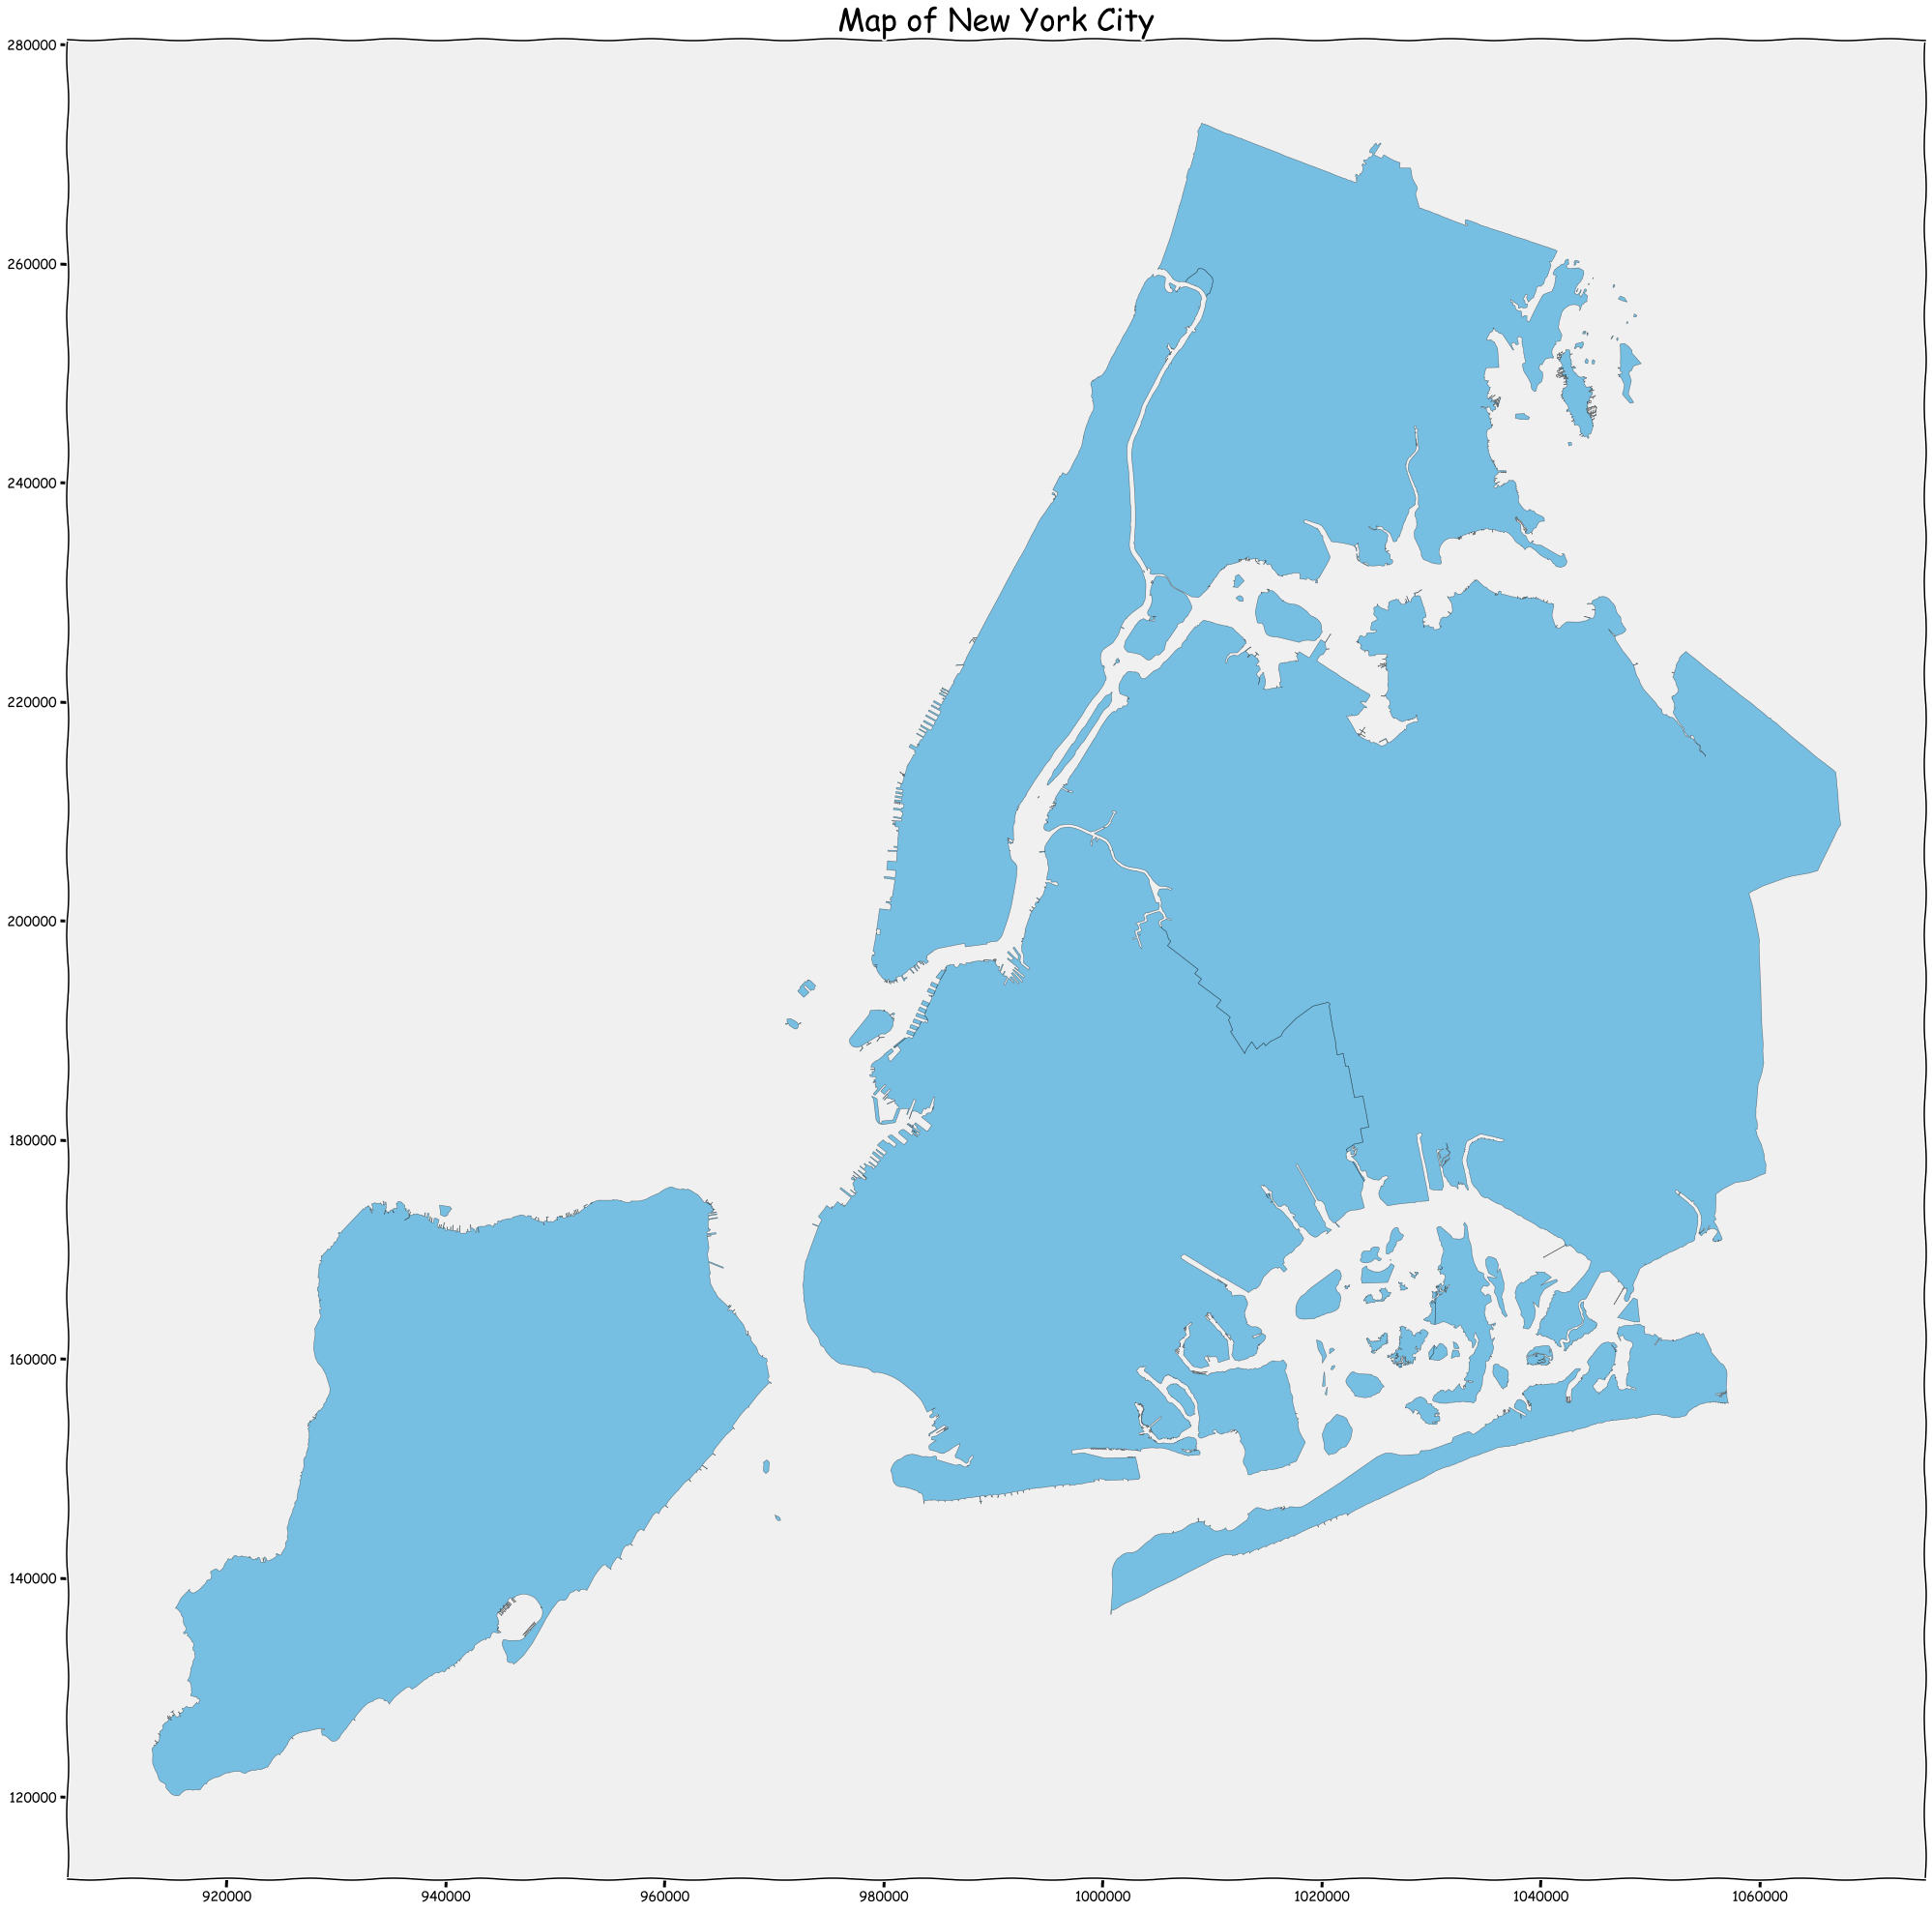

In [5]:
# Map bottom layer
import geopandas as gpd

# Set style
plt.xkcd()

# Read GPD data
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

# Visualize
ax = nyc.plot(figsize = [35, 35], alpha = 0.5, edgecolor = 'k')
plt.title('Map of New York City', fontsize = 32)

In [6]:
# Plot NYC w/folium
m = folium.Map(location = [40.767937, -73.982155], tiles = 'Stamen Toner', zoomstart = 11)

In [7]:
m

[]

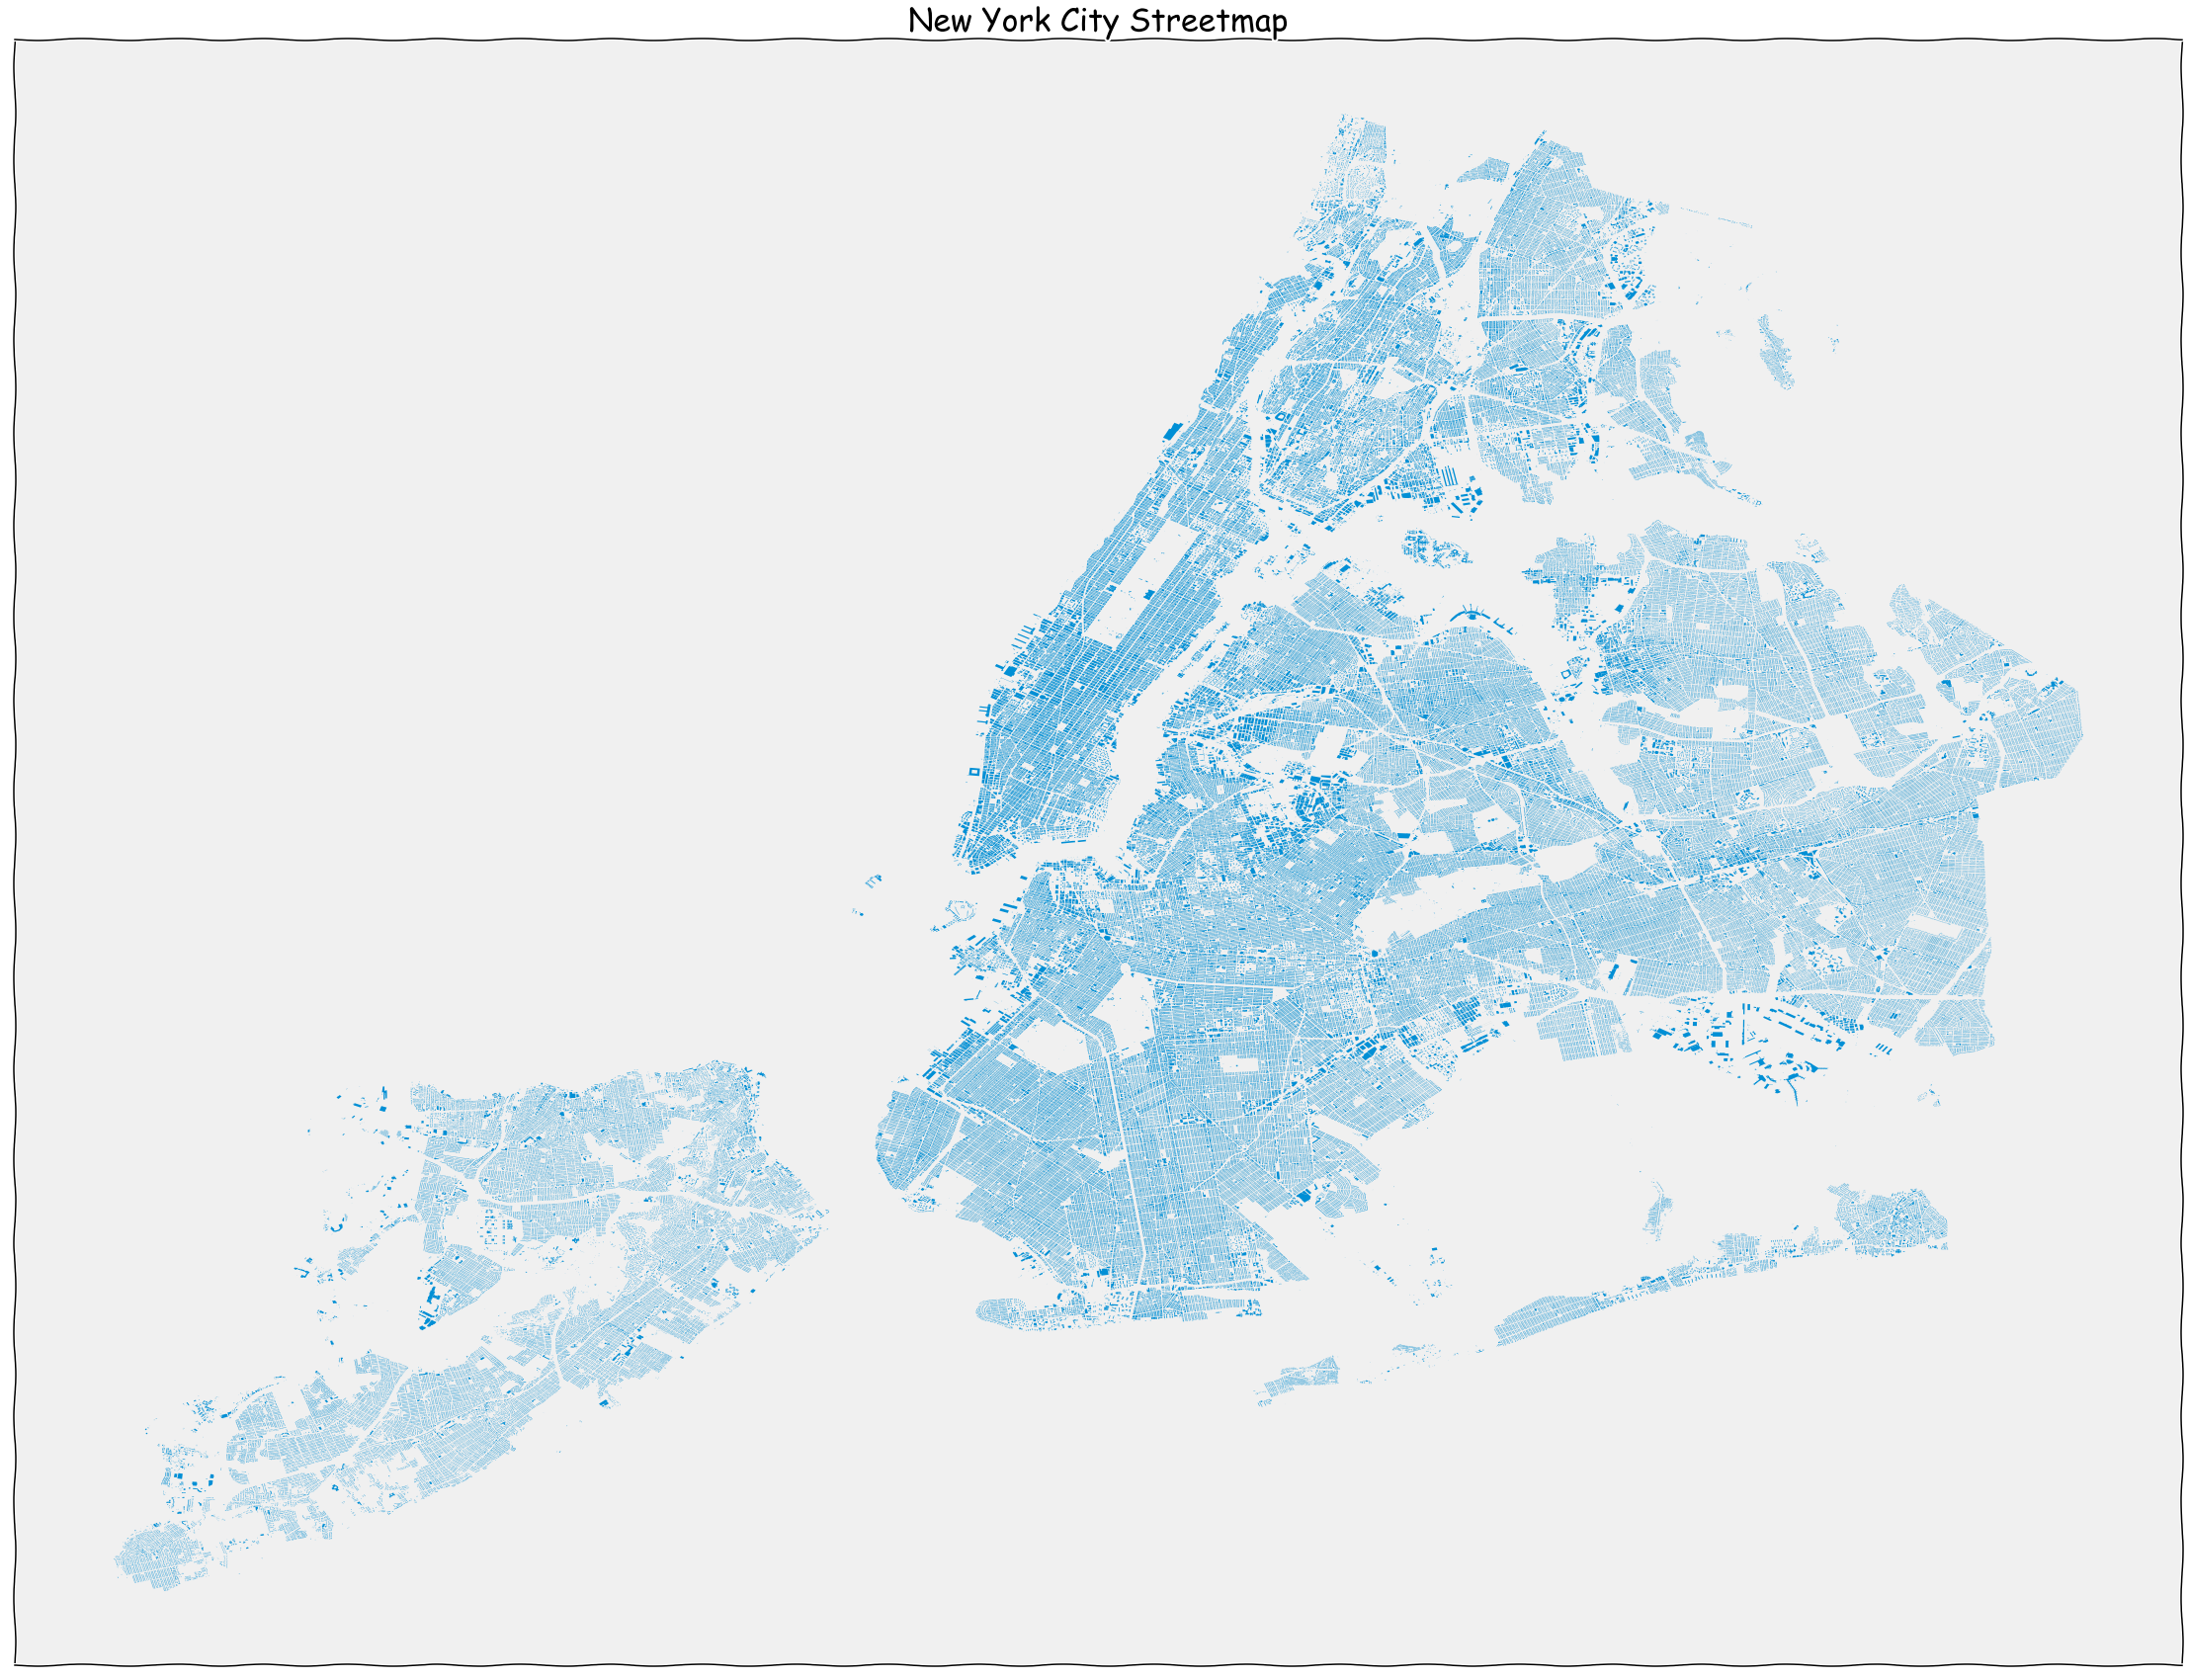

In [8]:
# Read NYC geojson
nyc = gpd.read_file('nyc.geojson')

## Visualize using GPD
plt.xkcd()
ax = nyc.plot(figsize = [35, 35])
ax.set_title('New York City Streetmap', fontsize = 32)
ax.set_xticks([])
ax.set_yticks([])

In [ ]:
# Overlay the listings
nyc.plot()
plt.scatter(y = df1['latitude'], x = df1['longitude'], c = 'r', s = .2)
plt.title('NY Street Map w/ Airbnb Listings', fontsize = 32)
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
# Subset for testing
df2 = df1.sample(n = 100)

# Using colored map
m1 = gen_base_map()

# Import library
from folium import HeatMap

# Draw
HeatMap(data = df2[['latitude', 
                    'longitude', 
                    'price']].groupby(['latitude', 
                                       'longitude']).sum().reset_index().values.tolist(), radius = 8, max_zoom = 13).add_to(m1)

ImportError: cannot import name 'HeatMap' from 'folium' (/Users/zxs/miniconda3/lib/python3.7/site-packages/folium/__init__.py)

In [17]:
m3 = gen_base_map()

folium.Choropleth(geo_data = nyc,
                  name = 'choropleth',
                  data = df2,
                  columns = ['latitude', 'longitude', 'price'],
                  fill_color = 'YlGn',
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = 'Unemployment Rate (%)').add_to(m3)

folium.LayerControl().add_to(m3)

KeyboardInterrupt: 

In [ ]:
m3